# Exploring the Weather in Athens
This is the first assignment for the course "Applied Machine Learning".

The purpose of this assignment is to analyze the weather in Athens for the period from 1955 to 2020.

>Nikolas Moatsos

* First, we import all the necessary libraries that will be used throughout the assignment.

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

## Questions

### Q1: Obtain the Data

Here is the main data set that will be used during the analysis and it's available at [https://www.ncdc.noaa.gov/cdo-web/](https://www.ncdc.noaa.gov/cdo-web/). It includes data from the years 1955 to 2021 and were collected from the station located in Hellinikon, Athens.

The main attributes of the data set are:
* *PRCP*: precipitation (mm)
* *TAVG*: average daily temperature (Celsius)
* *TMAX*: maximum daily temperature (Celsius)
* *TMIN*: minimum daily temperature (Celsius)

In this analysis we will concetrate to the *TAVG* and the *PCRP*. 

* The data set, that we downloaded from the previous mentioned website, is inside a csv file, so we use the *read_csv* method, offered by the Pandas library, in order to create our main DataFrame.

In [2]:
hellinikon = pd.read_csv('data/hellinikon.csv', 
                   parse_dates=['DATE'])

hellinikon

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.0,NaN,18.5,10.2
1,GR000016716,1955-01-02,2.0,NaN,14.4,7.0
2,GR000016716,1955-01-03,0.0,NaN,15.8,9.6
3,GR000016716,1955-01-04,0.0,NaN,18.8,7.3
4,GR000016716,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...,...
23532,GR000016716,2021-10-13,0.0,19.8,25.5,14.9
23533,GR000016716,2021-10-14,5.6,17.5,19.6,16.0
23534,GR000016716,2021-10-15,79.2,19.7,23.6,16.2
23535,GR000016716,2021-10-16,2.5,19.9,24.4,17.6


* We can notice that inside our data there is a column named "STATION", which is the code of the station that we got our data from. Since we will not use the code and it's the same for all the rows of the DataFrame, we delete the column and keep only the necessary data for our analysis.

In [3]:
del hellinikon['STATION']

hellinikon.head(3)

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6


* Because our analysis will include data only from 1955-2020, we drop all the rows regarding the year 2021, which are not needed.

In [4]:
hellinikon.drop(hellinikon[hellinikon['DATE'].dt.year == 2021].index, inplace=True)

hellinikon

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9
23248,2020-12-29,0.0,16.3,19.9,12.5
23249,2020-12-30,0.0,16.4,19.9,14.8


* After taking a quick look at our data we can notice that a lot of values, regarding the weather, are missing (blank cells). 
* Also some years have very minimum information and a lot of dates are missing. 
* Here are some examples :

In [5]:
hellinikon[20980:20988]

,DATE,PRCP,TAVG,TMAX,TMIN
20980,2013-05-16,0.0,20.9,NaN,14.2
20981,2013-05-28,0.0,22.6,NaN,11.6
20982,2013-06-05,0.0,23.2,NaN,16.2
20983,2013-06-07,0.0,23.3,NaN,20.0
20984,2013-06-11,0.0,27.0,NaN,21.4
20985,2013-11-20,1.8,19.3,NaN,15.0
20986,2014-07-23,0.0,28.4,NaN,26.2
20987,2014-07-25,NaN,29.3,32.9,NaN


* In order to fix this problem to some extent, we also include a data set from another [website](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f).

* This data set provides us more data for the years 2010 to 2019. In this way we can diminish significantly our missing values for these years. However, the data were collected from Athen's Centre, which is near Hellinikon. As a result we can make the assumption that both data sets represent the same thing. Also, the dataset is in the same metric system with the previous one (Celsius & mm).


* In order to create our second DataFrame we use the same procedure as previous.

In [6]:
athens = pd.read_csv('data/athens.csv', header=None)

athens

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1/1/2010,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,1/2/2010,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,1/3/2010,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,1/4/2010,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,1/5/2010,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,12/27/2019,10.1,10.2,10,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,12/28/2019,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,12/29/2019,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,12/30/2019,4,4,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


* Although, due to a lot of unwanted columns and the absence of headers we make some more actions to get the DataFrame in the same format as the other one.

In [7]:
athens.drop(athens.columns[[4,5,6,7,8,9,11,12,13]], axis=1, inplace=True)

athens.columns = ['DATE', 'TAVG', 'TMAX', 'TMIN', 'PRCP']
athens = athens.reindex(columns=['DATE','PRCP', 'TAVG', 'TMAX', 'TMIN'])

athens.head(3)

,DATE,PRCP,TAVG,TMAX,TMIN
0,1/1/2010,0.2,17.9,18.1,17.8
1,1/2/2010,0.0,15.6,15.7,15.5
2,1/3/2010,0.0,13.5,13.6,13.4


* With more searching, we can see that there are very few lines in our new data set that have missing values and use the characters "---" to represent them. 
* So, we drop every line that has missing values, since they have no use.

In [8]:
athens.drop(athens[athens['TAVG'] == '---'].index, inplace=True)

athens.shape

(3649, 5)

* Now that our new data set is clean we can set the right data type to each column.

In [9]:
athens['DATE'] = athens['DATE'].astype("datetime64[ns]")
athens[['TAVG', 'TMAX', 'TMIN', 'PRCP']] = athens[['TAVG', 'TMAX', 'TMIN', 'PRCP']].astype('float64')

athens.dtypes

DATE    datetime64[ns]
PRCP           float64
TAVG           float64
TMAX           float64
TMIN           float64
dtype: object

* After we have made the necessary pre-processing to the new dataset, we can start the merging procedure.

* First we have to drop every line that has a missing value for the PRCP and TAVG attribute and, in the same time, its date is included in the new data set, in order to complete it later.

In [10]:
hellinikon.drop(hellinikon[hellinikon.DATE.isin(athens.DATE) &
    (hellinikon['PRCP'].isna() | hellinikon['TAVG'].isna())].index,
        inplace=True)

hellinikon.shape

(23149, 5)

* We are now able to merge the new data set to the original. 
* To achieve this we append every line that its date is not included in the original dataset (must have been deleted before or never existed). 
* Next, we sort the data set by the date to acquire an ascending chronological order.

In [11]:
hellinikon = hellinikon.append(athens.loc[~athens.DATE.isin(hellinikon.DATE)], ignore_index=True)
hellinikon = hellinikon.sort_values(by='DATE', ignore_index=True)

hellinikon

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
24098,2020-12-27,0.0,16.6,NaN,NaN
24099,2020-12-28,6.6,14.8,18.2,11.9
24100,2020-12-29,0.0,16.3,19.9,12.5
24101,2020-12-30,0.0,16.4,19.9,14.8


* After this procedure, we have filled as many missing values as we could. 
* There are also a lot of missing values for the years that were not included in the "Athens" data set, but now we have enough information to make the analysis.

### Q2: Deviation of Summer Temperatures

#### Purpose:
- The purpose of this question is to represent the mean summer temperature deviation from a baseline of the 1971-2000 period.

* First, we select only the dates and the average temperatures from our data set and create a copy.

In [12]:
hellinikon_avg = hellinikon[['DATE','TAVG']].copy()

hellinikon_avg

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
24098,2020-12-27,16.6
24099,2020-12-28,14.8
24100,2020-12-29,16.3
24101,2020-12-30,16.4


* For this question we will need the month number and the number of the year in separate columns, to make the procedure easier.

* For the month number:

In [13]:
f = lambda x: x.month
hellinikon_avg['MONTH'] = hellinikon_avg['DATE'].map(f)

hellinikon_avg.head()

,DATE,TAVG,MONTH
0,1955-01-01,NaN,1
1,1955-01-02,NaN,1
2,1955-01-03,NaN,1
3,1955-01-04,NaN,1
4,1955-01-05,NaN,1


For the year number:

In [14]:
f = lambda x: x.year
hellinikon_avg['YEAR'] = hellinikon_avg['DATE'].map(f)

hellinikon_avg.head() 

,DATE,TAVG,MONTH,YEAR
0,1955-01-01,NaN,1,1955
1,1955-01-02,NaN,1,1955
2,1955-01-03,NaN,1,1955
3,1955-01-04,NaN,1,1955
4,1955-01-05,NaN,1,1955


* We will also need to restrict the data for summer months only (June, July, August).

In [15]:
hellinikon_avg_summ = hellinikon_avg[(hellinikon_avg['MONTH']== 6) | (hellinikon_avg['MONTH'] == 7) | (hellinikon_avg['MONTH'] == 8)]

hellinikon_avg_summ

,DATE,TAVG,MONTH,YEAR
151,1955-06-01,NaN,6,1955
152,1955-06-02,NaN,6,1955
153,1955-06-03,NaN,6,1955
154,1955-06-04,NaN,6,1955
155,1955-06-05,NaN,6,1955
...,...,...,...,...
23976,2020-08-27,28.3,8,2020
23977,2020-08-28,29.5,8,2020
23978,2020-08-29,29.3,8,2020
23979,2020-08-30,27.8,8,2020


* After our data is ready we move on with the calculations:

    - First, we group the data by the year in order to get all the average daily temperatures of the summer, for each year. 
    - Second, we calculate the mean of the average daily temperatures of the summer of each year and we get a single value for each year.

In [16]:
hellinikon_avg_summ_group_by_year = hellinikon_avg_summ.groupby('YEAR')

hellinikon_avg_summ_by_year = hellinikon_avg_summ_group_by_year['TAVG'].mean()

hellinikon_avg_summ_by_year.head()

YEAR
1955          NaN
1956          NaN
1957    28.091935
1958    27.081522
1959          NaN
Name: TAVG, dtype: float64

* Now it's time to calculate the baseline for the period 1974-1999

* To achieve this, we use the data with the mean of the  average daily summer temperatures of each year and we restrict the data only for the needed years.

In [17]:
hellinikon_avg_summ_by_year_baseline = hellinikon_avg_summ_by_year.loc[(hellinikon_avg_summ_by_year.index >= 1974) & (hellinikon_avg_summ_by_year.index <= 1999)]

hellinikon_avg_summ_by_year_baseline.head()

YEAR
1974    26.512791
1975    25.935870
1976    24.820652
1977    26.558696
1978    25.790217
Name: TAVG, dtype: float64

* Then, we can calculate the baseline, which represents the average temperature of the summer, for the years 1974-1999.

In [18]:
baseline_summ = hellinikon_avg_summ_by_year_baseline.mean()

baseline_summ

26.232849809442328

* Next, we can calculate the difference between the mean summer temperature of each year and the baseline value.

In [19]:
mean_temp_diff = hellinikon_avg_summ_by_year - baseline_summ

mean_temp_diff.head()

YEAR
1955         NaN
1956         NaN
1957    1.859086
1958    0.848672
1959         NaN
Name: TAVG, dtype: float64

* Furthermore, we calculte the rolling average of the mean summer temperature difference of each year with a window of 10 years.

In [20]:
rolling_avg = mean_temp_diff.rolling(window=10,min_periods=1).mean()

rolling_avg.head(12)

YEAR
1955         NaN
1956         NaN
1957    1.859086
1958    1.353879
1959    1.353879
1960    1.353879
1961    1.043085
1962    1.104264
1963    1.151787
1964    0.978441
1965    0.879002
1966    0.868553
Name: TAVG, dtype: float64

* Finally, we are able to visualize our results, but first we will need to concetrate our findings into a DataFrame in order to make the visualization easier.

In [21]:
summ_df = pd.concat([mean_temp_diff,rolling_avg], axis=1)
summ_df.columns = ['mean_temp_diff', 'rolling_avg']
summ_df.reset_index(level=0, inplace=True)

summ_df.head()

,YEAR,mean_temp_diff,rolling_avg
0,1955,NaN,NaN
1,1956,NaN,NaN
2,1957,1.859086,1.859086
3,1958,0.848672,1.353879
4,1959,NaN,1.353879


* When the DataFrame is ready, we plot the mean summer temperature differences from the 1974-1999 mean with a bar plot, showing the difference of each year. 
* Also, we plot the rolling average of the mean summer temperature differences of each year, with a line. 
* With orange we depict all the years that have a positive mean summer temperature difference from the baseline and with blue all the years that have a negative mean summer temperature difference from the baseline.

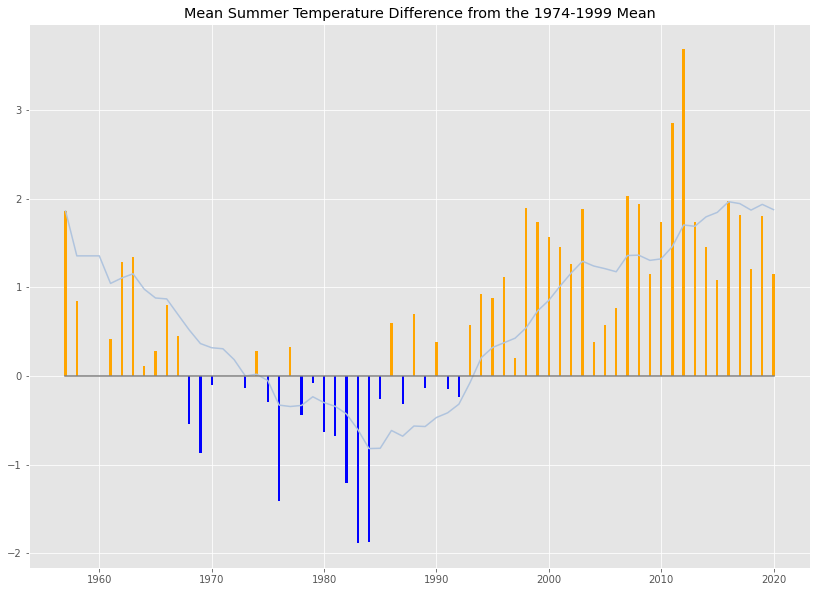

In [22]:
plt.figure(figsize=(14,10))
ax = plt.subplot()

plt.plot(summ_df['YEAR'], summ_df['rolling_avg'],color='lightsteelblue')

colors = mean_temp_diff
f = lambda x: 'orange' if x > 0 else 'blue'
colors = colors.map(f)

ax.bar(summ_df['YEAR'], summ_df['mean_temp_diff'], width=.20, color=colors)

plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean')

plt.axhline(0,color='grey',xmin=0.046,xmax=0.954);

#### Interpretation:
After looking at the plot, we can notice that the average summer temperature in comparison to the 1974-1999 period is significantly increasing as the years pass.

By having the differences from the 1974-1999 mean, we see that from 1990 and later the  average summer temperature of each year is always greater than the baseline (except the first two years). Also, we can conclude that after 1990 there is an uptrend in the average summer temperatures. The uptrend is obvious by looking at rolling average which indicates the average of the last 10 years.

### Q3: Evolution of Daily Temperatures

#### Purpose:
- The purpose of the this question is to represent the evolution of daily temperatures over the years.

* First, we create a copy of the DataFrame that we used in the previous question.

In [23]:
hellinikon_avg_daily = hellinikon_avg.copy()

hellinikon_avg_daily

,DATE,TAVG,MONTH,YEAR
0,1955-01-01,NaN,1,1955
1,1955-01-02,NaN,1,1955
2,1955-01-03,NaN,1,1955
3,1955-01-04,NaN,1,1955
4,1955-01-05,NaN,1,1955
...,...,...,...,...
24098,2020-12-27,16.6,12,2020
24099,2020-12-28,14.8,12,2020
24100,2020-12-29,16.3,12,2020
24101,2020-12-30,16.4,12,2020


* Because we want to analyze the evolution of the average daily temparatures for each year it's helpful to create an attribute that indicates the day of the year that a specific temperature was captured. 

In [24]:
f = lambda x: x.strftime('%m-%d')
hellinikon_avg_daily['DAY'] = hellinikon_avg_daily['DATE'].map(f)

hellinikon_avg_daily

,DATE,TAVG,MONTH,YEAR,DAY
0,1955-01-01,NaN,1,1955,01-01
1,1955-01-02,NaN,1,1955,01-02
2,1955-01-03,NaN,1,1955,01-03
3,1955-01-04,NaN,1,1955,01-04
4,1955-01-05,NaN,1,1955,01-05
...,...,...,...,...,...
24098,2020-12-27,16.6,12,2020,12-27
24099,2020-12-28,14.8,12,2020,12-28
24100,2020-12-29,16.3,12,2020,12-29
24101,2020-12-30,16.4,12,2020,12-30


* To create a smoother line we will use a 30 days rolling average for each day.

In [25]:
hellinikon_avg_daily['TAVG'] = hellinikon_avg_daily['TAVG'].rolling(window=30, min_periods=1).mean()

hellinikon_avg_daily

,DATE,TAVG,MONTH,YEAR,DAY
0,1955-01-01,NaN,1,1955,01-01
1,1955-01-02,NaN,1,1955,01-02
2,1955-01-03,NaN,1,1955,01-03
3,1955-01-04,NaN,1,1955,01-04
4,1955-01-05,NaN,1,1955,01-05
...,...,...,...,...,...
24098,2020-12-27,14.086667,12,2020,12-27
24099,2020-12-28,14.153333,12,2020,12-28
24100,2020-12-29,14.153333,12,2020,12-29
24101,2020-12-30,14.193333,12,2020,12-30


* Next, we group the data by the year.

In [26]:
hellinikon_avg_by_year_group = hellinikon_avg_daily.groupby(['YEAR'])
for group in list(hellinikon_avg_by_year_group)[:2]:
    print(group)

(1955,           DATE  TAVG  MONTH  YEAR    DAY
0   1955-01-01   NaN      1  1955  01-01
1   1955-01-02   NaN      1  1955  01-02
2   1955-01-03   NaN      1  1955  01-03
3   1955-01-04   NaN      1  1955  01-04
4   1955-01-05   NaN      1  1955  01-05
..         ...   ...    ...   ...    ...
360 1955-12-27   NaN     12  1955  12-27
361 1955-12-28   NaN     12  1955  12-28
362 1955-12-29   NaN     12  1955  12-29
363 1955-12-30   NaN     12  1955  12-30
364 1955-12-31   NaN     12  1955  12-31

[365 rows x 5 columns])
(1956,           DATE  TAVG  MONTH  YEAR    DAY
365 1956-01-01   NaN      1  1956  01-01
366 1956-01-02   NaN      1  1956  01-02
367 1956-01-03   NaN      1  1956  01-03
368 1956-01-04   NaN      1  1956  01-04
369 1956-01-05   NaN      1  1956  01-05
..         ...   ...    ...   ...    ...
726 1956-12-27   NaN     12  1956  12-27
727 1956-12-28   NaN     12  1956  12-28
728 1956-12-29   NaN     12  1956  12-29
729 1956-12-30   NaN     12  1956  12-30
730 1956-12-31   N

* Now that we have the daily temperatures for each year smoothed by the rolling average, we will calculate the average daily temperatures for the period 1974-1999.


* We select only the required years for the baseline period.

In [27]:
hellinikon_avg_daily_baseline = hellinikon_avg_daily.loc[(hellinikon_avg_daily.YEAR >= 1974) & (hellinikon_avg_daily.YEAR <= 1999)].copy()
hellinikon_avg_daily_baseline

,DATE,TAVG,MONTH,YEAR,DAY
6940,1974-01-01,13.103333,1,1974,01-01
6941,1974-01-02,13.146667,1,1974,01-02
6942,1974-01-03,13.100000,1,1974,01-03
6943,1974-01-04,12.963333,1,1974,01-04
6944,1974-01-05,12.846667,1,1974,01-05
...,...,...,...,...,...
16431,1999-12-27,13.303333,12,1999,12-27
16432,1999-12-28,13.540000,12,1999,12-28
16433,1999-12-29,13.680000,12,1999,12-29
16434,1999-12-30,13.753333,12,1999,12-30


* We calculate the mean of the daily temperatures for the baseline period.
* We also remove the day "29-02", because for this period there are very few values and the average temparature for this day is biased.

In [28]:
hellinikon_avg_daily_baseline_group = hellinikon_avg_daily_baseline.groupby('DAY').mean()['TAVG']
hellinikon_avg_daily_baseline_group.drop(labels='02-29', inplace=True)
hellinikon_avg_daily_baseline_group

DAY
01-01    11.268205
01-02    11.223205
01-03    11.163205
01-04    11.073205
01-05    10.987051
           ...    
12-27    11.620641
12-28    11.527436
12-29    11.451282
12-30    11.410000
12-31    11.365000
Name: TAVG, Length: 365, dtype: float64

* In order to visualize our findings (the evolution of each year) we will need all the years that have values.

In [29]:
years = hellinikon_avg_by_year_group.size()

len(years)

66

* Now we visualize the data by plotting a line for each year. Each line represents the temperature through the days of the year.
* The color of the line indicates the year, so as the years go the color becomes darker. 
* Lastly, the black line are the mean of the average daily temperatures for the 1974-1999 period.  

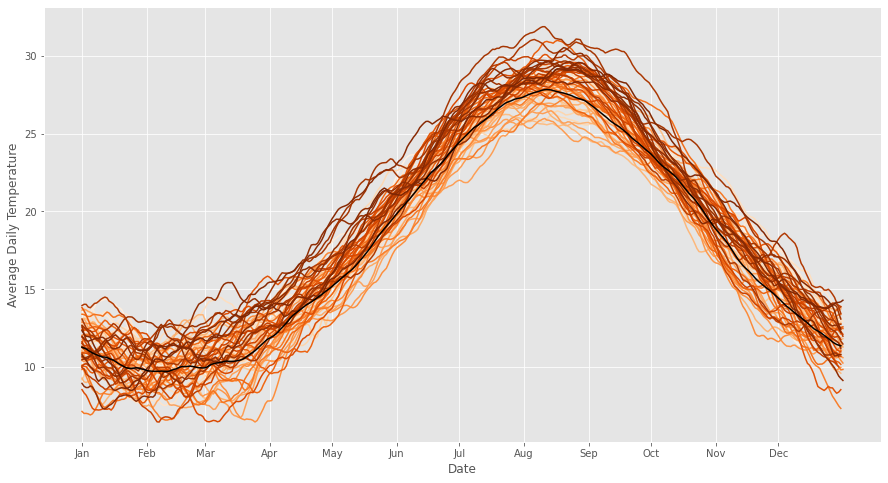

In [30]:
plt.figure(figsize=(15,8))
ax = plt.subplot()

ax.set_prop_cycle('color',plt.cm.Oranges(np.linspace(0,1,len(years))))

for key, grp in hellinikon_avg_by_year_group:
    ax = grp.plot(x ='DAY',y ='TAVG', ax=ax)

hellinikon_avg_daily_baseline_group.plot(color='black')

ax.get_legend().remove()
plt.xlabel('Date')
plt.ylabel('Average Daily Temperature')

locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')

x = plt.gca().xaxis
x.set_major_locator(locator)
x.set_major_formatter(fmt)

xticks = ax.xaxis.get_major_ticks()
xticks[-1].set_visible(False)

#### Interpretation:
After looking at the plot, we can see that the temperature has a specific trend through the year, with the highest temperatures being during the Summer and the lowest during the Winter, which is normal. 

What's interesting from this plot is that the temperatures tend to increase as the years pass. This is depicted through the color of the lines, where the darker lines tend to have higher values. Also, we can see that the biggest difference is during the Summer, where the recent years have significantly higher values. This difference starts to increase from the Spring and peaks during the Summer, afterwards the diffrence decreases and becomes very small during the Winter.

Lastly, we can notice that in the recent years the temperatures tend to deviate considerably from the baseline, indicating that the temperature increase has an uptrend. This findings with the summer temperature increases also confirm the ones from the first question.

### Q4: Extreme Temperature Events

#### Purpose:
- The purpose of the this question is to represent the number of extreme events compared to baseline period of 1974-1999.

* First, we create a copy of the Dataframe that we used in the second question.

In [31]:
hellinikon_avg_extreme = hellinikon_avg.copy()

hellinikon_avg_extreme

,DATE,TAVG,MONTH,YEAR
0,1955-01-01,NaN,1,1955
1,1955-01-02,NaN,1,1955
2,1955-01-03,NaN,1,1955
3,1955-01-04,NaN,1,1955
4,1955-01-05,NaN,1,1955
...,...,...,...,...
24098,2020-12-27,16.6,12,2020
24099,2020-12-28,14.8,12,2020
24100,2020-12-29,16.3,12,2020
24101,2020-12-30,16.4,12,2020


* Similarly to the previous question we create a new column with only the day & month of each row, beacause we will compare each day of the year with the baseline in order to decide if it's an extreme event. 

In [32]:
f = lambda x: x.strftime('%m-%d')
hellinikon_avg_extreme['DAY'] = hellinikon_avg_extreme['DATE'].map(f)

hellinikon_avg_extreme

,DATE,TAVG,MONTH,YEAR,DAY
0,1955-01-01,NaN,1,1955,01-01
1,1955-01-02,NaN,1,1955,01-02
2,1955-01-03,NaN,1,1955,01-03
3,1955-01-04,NaN,1,1955,01-04
4,1955-01-05,NaN,1,1955,01-05
...,...,...,...,...,...
24098,2020-12-27,16.6,12,2020,12-27
24099,2020-12-28,14.8,12,2020,12-28
24100,2020-12-29,16.3,12,2020,12-29
24101,2020-12-30,16.4,12,2020,12-30


* Next, we need to create the baseline temperatures based on which we will make the comparisons.

* To do so, we restrict the data to be only for the 1974-1999 period.

In [33]:
hellinikon_avg_extreme_baseline = hellinikon_avg_extreme.loc[(hellinikon_avg_extreme.YEAR >= 1974) & (hellinikon_avg_extreme.YEAR <= 1999)]

hellinikon_avg_extreme_baseline

,DATE,TAVG,MONTH,YEAR,DAY
6940,1974-01-01,11.6,1,1974,01-01
6941,1974-01-02,13.7,1,1974,01-02
6942,1974-01-03,12.2,1,1974,01-03
6943,1974-01-04,10.8,1,1974,01-04
6944,1974-01-05,9.6,1,1974,01-05
...,...,...,...,...,...
16431,1999-12-27,15.4,12,1999,12-27
16432,1999-12-28,16.9,12,1999,12-28
16433,1999-12-29,15.1,12,1999,12-29
16434,1999-12-30,13.4,12,1999,12-30


* Afterwards, we create a pivot table with every day of the year as the rows, the baseline years as the columns and the daily average temperatures as values.

In [34]:
hellinikon_avg_extreme_baseline_pivot = hellinikon_avg_extreme_baseline.pivot_table(index='DAY',columns='YEAR',values='TAVG') 

hellinikon_avg_extreme_baseline_pivot

YEAR,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
DAY,,,,,,,,,,,,,,,,,,,,,
01-01,11.6,8.7,11.3,10.2,7.0,16.6,10.7,8.0,11.7,1.8,...,9.2,11.2,3.6,8.0,12.1,17.6,13.9,12.7,9.4,9.1
01-02,13.7,7.5,12.4,9.1,4.6,14.2,11.3,8.2,14.8,4.7,...,8.8,13.2,5.1,8.2,12.2,17.6,14.1,11.7,10.4,10.2
01-03,12.2,7.8,13.6,9.1,6.1,4.4,11.2,6.4,11.3,5.6,...,8.3,10.3,9.4,9.4,10.3,12.5,12.7,12.8,12.0,13.2
01-04,10.8,7.2,13.6,7.4,8.9,3.8,4.9,11.8,10.0,7.8,...,6.1,10.6,9.5,7.5,10.2,10.5,9.9,15.3,12.5,13.3
01-05,9.6,7.7,8.4,6.2,9.4,15.3,3.3,13.1,10.6,9.8,...,4.4,11.6,10.7,5.3,12.3,11.2,8.3,15.3,12.7,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,11.7,7.1,8.2,7.5,12.4,6.2,9.9,9.8,9.3,13.3,...,10.5,4.3,5.2,14.3,10.8,16.3,6.4,12.2,5.9,15.4
12-28,11.6,8.7,5.6,7.9,14.0,7.1,11.0,10.0,9.0,12.1,...,12.2,5.5,5.1,12.8,9.9,15.8,5.7,12.8,9.3,16.9
12-29,11.6,9.6,7.0,12.1,14.1,8.8,9.3,11.6,8.9,10.4,...,12.4,4.4,6.4,11.7,9.6,15.1,7.5,12.7,9.8,15.1


* In the pivot table, we calculate the mean of the average daily temperatures of each day of the year, for the baseline period.

In [35]:
baseline = hellinikon_avg_extreme_baseline_pivot.mean(axis=1)

baseline

DAY
01-01    10.365385
01-02    10.707692
01-03    10.207692
01-04     9.634615
01-05     9.919231
           ...    
12-27     9.769231
12-28    10.207692
12-29    10.776923
12-30    11.353846
12-31    11.007692
Length: 366, dtype: float64

* Now, we add the baseline temperatures to the DataFrame that we use in this question. 
* In each row, by looking at the day of the year, we add the expected value of this day according to the baseline.

In [36]:
f = lambda x: baseline[x]

hellinikon_avg_extreme['EXPECTED'] = hellinikon_avg_extreme['DAY'].map(f)

hellinikon_avg_extreme

,DATE,TAVG,MONTH,YEAR,DAY,EXPECTED
0,1955-01-01,NaN,1,1955,01-01,10.365385
1,1955-01-02,NaN,1,1955,01-02,10.707692
2,1955-01-03,NaN,1,1955,01-03,10.207692
3,1955-01-04,NaN,1,1955,01-04,9.634615
4,1955-01-05,NaN,1,1955,01-05,9.919231
...,...,...,...,...,...,...
24098,2020-12-27,16.6,12,2020,12-27,9.769231
24099,2020-12-28,14.8,12,2020,12-28,10.207692
24100,2020-12-29,16.3,12,2020,12-29,10.776923
24101,2020-12-30,16.4,12,2020,12-30,11.353846


* After the addition of the baseline temperatures we calculate for each row if it's an extreme event(True/False). 
* As an extreme event we consider a day that its temperature is 10% higher than the expected(baseline value).

In [37]:
extreme_true = ((hellinikon_avg_extreme.TAVG - hellinikon_avg_extreme.EXPECTED) / hellinikon_avg_extreme.EXPECTED) > 0.1

extreme_true

0        False
1        False
2        False
3        False
4        False
         ...  
24098     True
24099     True
24100     True
24101     True
24102     True
Length: 24103, dtype: bool

* After the calculation of the days that are considered as extreme events, we add them to the DataFrame.

In [38]:
hellinikon_avg_extreme.insert(5,'EXTREME',extreme_true)

hellinikon_avg_extreme

,DATE,TAVG,MONTH,YEAR,DAY,EXTREME,EXPECTED
0,1955-01-01,NaN,1,1955,01-01,False,10.365385
1,1955-01-02,NaN,1,1955,01-02,False,10.707692
2,1955-01-03,NaN,1,1955,01-03,False,10.207692
3,1955-01-04,NaN,1,1955,01-04,False,9.634615
4,1955-01-05,NaN,1,1955,01-05,False,9.919231
...,...,...,...,...,...,...,...
24098,2020-12-27,16.6,12,2020,12-27,True,9.769231
24099,2020-12-28,14.8,12,2020,12-28,True,10.207692
24100,2020-12-29,16.3,12,2020,12-29,True,10.776923
24101,2020-12-30,16.4,12,2020,12-30,True,11.353846


* Next, we create a pivot table with the years as the rows, the days as the columns and values if a day of a year is an extreme event.

In [39]:
hellinikon_avg_extreme_pivot_by_year = hellinikon_avg_extreme.pivot_table(index='YEAR',columns='DAY',values='EXTREME') 

hellinikon_avg_extreme_pivot_by_year

DAY,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
YEAR,,,,,,,,,,,,,,,,,,,,,
1955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1956,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1958,True,True,True,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
1959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,False,False,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
2017,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2018,False,True,True,False,False,True,True,True,True,True,...,False,True,True,False,False,False,False,False,False,False


* With the above table we calculate the number of extreme events of each year.

In [40]:
s = hellinikon_avg_extreme_pivot_by_year.sum(axis=1)
s

YEAR
1955      0.0
1956      0.0
1957     52.0
1958    130.0
1959      0.0
        ...  
2016    159.0
2017    173.0
2018    173.0
2019    163.0
2020    168.0
Length: 66, dtype: float64

* Next, we create a pivot table with the years as the rows, the days as the columns and values the average temperatures. 
* We create this new table because the previous has all the values filled and by applying the count function we will get 365, despite that a day had no value.

In [41]:
hellinikon_avg_extreme_pivot_by_year = hellinikon_avg_extreme.pivot_table(index='YEAR',columns='DAY',values='TAVG') 

hellinikon_avg_extreme_pivot_by_year

DAY,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
YEAR,,,,,,,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.6,8.9,9.9,9.3,10.2,10.2,9.8,11.9,15.7,15.8
1958,12.1,11.8,12.1,10.3,8.5,10.2,13.6,15.6,7.8,5.8,...,15.8,16.8,16.4,15.3,12.9,13.6,12.4,13.5,11.2,9.0
1961,12.0,12.2,13.6,13.8,15.3,15.9,11.6,12.0,13.7,14.1,...,7.2,9.2,15.1,16.3,16.1,13.9,16.4,17.5,14.1,13.8
1962,12.9,13.7,16.8,11.7,8.8,8.2,9.1,9.2,7.9,7.9,...,7.5,6.7,6.8,7.9,13.6,15.9,14.3,13.3,16.5,16.6
1963,15.1,13.9,13.2,16.4,15.0,15.0,16.6,17.0,15.2,13.5,...,18.4,15.3,9.4,9.1,8.9,10.6,12.4,8.8,8.4,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,3.8,7.9,11.3,13.4,16.8,15.9,14.1,13.4,13.2,13.2,...,6.8,7.9,9.2,9.1,11.2,10.8,7.2,3.9,3.6,3.4
2017,6.0,8.4,11.1,11.8,13.2,10.6,2.3,0.5,0.8,2.5,...,5.8,6.5,7.9,10.6,11.3,12.9,14.3,12.7,11.3,9.7
2018,11.3,13.7,11.5,9.6,10.4,11.6,13.9,15.2,14.0,13.2,...,12.2,13.5,12.5,9.6,6.0,6.9,8.8,10.8,10.6,9.7


* With the above table we calculate the number of the days that we have knowledge of their average temperatures. 

In [42]:
c = hellinikon_avg_extreme_pivot_by_year.count(axis=1)
c

YEAR
1957    184
1958    365
1961    365
1962    365
1963    364
       ... 
2016    366
2017    365
2018    365
2019    365
2020    366
Length: 61, dtype: int64

* By acquiring the sum of the extreme events and the count of the days for each year, we calculate the percentage of extreme events for each year. 

In [43]:
hellinikon_avg_extreme_by_year = s / c

hellinikon_avg_extreme_by_year

YEAR
1955         NaN
1956         NaN
1957    0.282609
1958    0.356164
1959         NaN
          ...   
2016    0.434426
2017    0.473973
2018    0.473973
2019    0.446575
2020    0.459016
Length: 66, dtype: float64

* Also, we calculate the average percentage of extreme events for the baseline period(1074-1999).

In [44]:
extreme_avg = hellinikon_avg_extreme_by_year.loc[(hellinikon_avg_extreme_by_year.index >= 1974) & (hellinikon_avg_extreme_by_year.index <= 1999)].mean() 

extreme_avg

0.24865917721445643

* After we are done with the calculations, we plot the data. 
* The bars represent the percentage of extreme events of each year. 
* The middle line(at .0248) represents the average of extreme events for the baseline period. 
* Lastly, with orange are the years that have a higher percentage from the baseline and with blue the years that have a smaller percentage from the baseline.

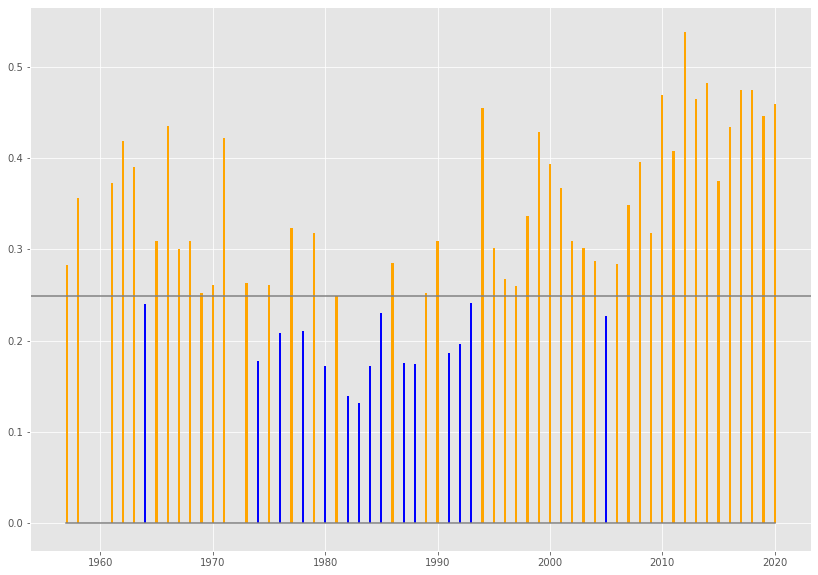

In [45]:
plt.figure(figsize=(14,10))
ax = plt.subplot()

colors = hellinikon_avg_extreme_by_year
f = lambda x: 'orange' if x > extreme_avg else 'blue'
colors = colors.map(f)

ax.bar(hellinikon_avg_extreme_by_year.index,hellinikon_avg_extreme_by_year.values, width=.20, color=colors)

plt.axhline(0,color='grey',xmin=0.046,xmax=0.954)

plt.axhline(extreme_avg,color='grey')

ax.set_ylim(bottom=-0.03);

#### Interpretation:
After looking at the plot we can notice that the extreme events compared to the baseline period of 1974-1999 become more and more as the years pass and the percentages increase. Specifically from 1995 and later the percentage of extreme events in a year are above the baseline(only except 2005) and we can see that there is an uptrend as the percentage increases, also from 2008 the percentages is almost above 40%. 

### Q5: Precipitation

#### Purpose:
- The purpose of the this question is to represent the intensity of rainfall over time.

* First, we create a copy of the original data set that we created in the first question and we take a subset with only the attributes of the date and the precipitation, which are the ones that we need for this analysis.

In [46]:
hellinikon_prcp = hellinikon[['DATE','PRCP']].copy()

hellinikon_prcp

,DATE,PRCP
0,1955-01-01,0.0
1,1955-01-02,2.0
2,1955-01-03,0.0
3,1955-01-04,0.0
4,1955-01-05,0.0
...,...,...
24098,2020-12-27,0.0
24099,2020-12-28,6.6
24100,2020-12-29,0.0
24101,2020-12-30,0.0


* Next, In order to count the rainfall of each year we will need the number of the year for each row.

In [47]:
f = lambda x: x.year
hellinikon_prcp['YEAR'] = hellinikon_prcp['DATE'].map(f)

hellinikon_prcp.head()

,DATE,PRCP,YEAR
0,1955-01-01,0.0,1955
1,1955-01-02,2.0,1955
2,1955-01-03,0.0,1955
3,1955-01-04,0.0,1955
4,1955-01-05,0.0,1955


* Now, we will group by the year and calculate the sum of each year, to find the yearly rainfall.

In [48]:
rainfall = hellinikon_prcp.groupby('YEAR').sum()

rainfall

,PRCP
YEAR,
1955,547.0
1956,281.3
1957,303.2
1958,350.0
1959,214.0
...,...
2016,261.6
2017,304.3
2018,380.2


* For the rainy days we will fill the data set with NaN values where the precipitation is 0, in order to avoid counting the days that had no rain. 

In [49]:
f = lambda x: np.NaN if x == 0 else x

hellinikon_prcp['PRCP'] = hellinikon_prcp['PRCP'].map(f)

hellinikon_prcp

,DATE,PRCP,YEAR
0,1955-01-01,NaN,1955
1,1955-01-02,2.0,1955
2,1955-01-03,NaN,1955
3,1955-01-04,NaN,1955
4,1955-01-05,NaN,1955
...,...,...,...
24098,2020-12-27,NaN,2020
24099,2020-12-28,6.6,2020
24100,2020-12-29,NaN,2020
24101,2020-12-30,NaN,2020


* Similarly to the rainfall we group by the year and count the rainy days for each year.

In [50]:
rainy_days = hellinikon_prcp.groupby('YEAR').count()


rainy_days

,DATE,PRCP
YEAR,,
1955,365,68
1956,366,52
1957,365,73
1958,365,68
1959,365,62
...,...,...
2016,366,42
2017,365,48
2018,365,55


* Then, we divide the rainfall over the rainy days, in order to find the rain ratio for each year.

In [51]:
rain_ratio = rainfall / rainy_days

rain_ratio = rain_ratio['PRCP']

rain_ratio

YEAR
1955    8.044118
1956    5.409615
1957    4.153425
1958    5.147059
1959    3.451613
          ...   
2016    6.228571
2017    6.339583
2018    6.912727
2019    9.827586
2020    5.536842
Name: PRCP, Length: 66, dtype: float64

* Lastly, we also apply a 10 years rolling average on the rain ratio.

In [52]:
rain_rolling_avg = rain_ratio.rolling(window=10,min_periods=1).mean()

rain_rolling_avg.head()

YEAR
1955    8.044118
1956    6.726867
1957    5.869053
1958    5.688554
1959    5.241166
Name: PRCP, dtype: float64

* Now, we are ready to visualize our findings. 
* We plot the rain ratio with bars for each year and the rolling average with a line. 

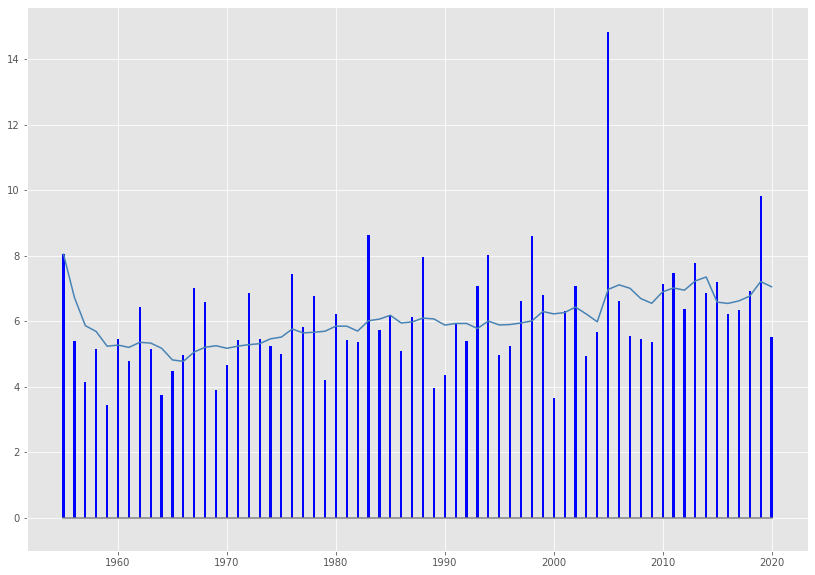

In [53]:
plt.figure(figsize=(14,10))
ax = plt.subplot()

ax.bar(rain_ratio.index,rain_ratio.values, width=.20, color='blue')
rain_rolling_avg.plot(color='steelblue')

plt.axhline(0,color='grey',xmin=0.046,xmax=0.954)

ax.set_ylim(bottom=-1)

ax.set(xlabel=None);

#### Interpretation:
After looking at the plot we can notice that we are getting rain in more concetrated bursts as the years pass. We see that the rain ratio bars over the years become bigger and bigger, which is also confirmed by the 10 year rolling average that has an uptrend. As a result, we conclude that, except the temperature extreme events, we have to be aware for the extreme events concerning the rainfall.  

### General conclusions:
By analyzing the data in the previous questions we can make some general conclusions regarding the weather in Athens.
It's obvious that the overheating of the planet is happening and it's increasing with quick rates. With the conclusions by the mean summer differences, the evolution of the daily temperatures and the extreme events we confirm that the temperature becomes higher every year, with more extreme events and with warmer Summers. Furthermore, by looking at the precipitation, the rainfall increases and gets concetrated in bigger bursts.
